# GRIP @ The Sparks Foundation

## Coder : VISHWA R. PATEL ( Data Science & Business Analytics Intern )

## Task 4 : Exploratory Data Analysis Terrorism on Global Terrorism Dataset

## ( Level - Intermediate )

<b style='font-size:18px'>Problem Statement</b>
<br><br>
<li>
    Perform 'Exploratory Data Analysis' on dataset 'Global Terrorism'.
</li>
<li>
    As a Security/Defense Analyst, Try to find out the hot zone of terrorism.
</li>
<li>
    What all security issues and insights you can derive by EDA?
</li>

## Import all the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Read the .csv dataset and print the head of data

In [2]:
df = pd.read_csv(r"D:\VISHWA\Datasets\globalterrorismdb_0718dist.csv")
print("Dataset successfully imported!")
df.head()

Dataset successfully imported!


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


## Changing the inconvenient column names

In [3]:
df.rename(columns={'iyear':'Year','imonth':'Month','city':'City','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
df['Casualities'] = df.Killed + df.Wounded
df=df[['Year','Month','Day','Country','Region','City','latitude','longitude','AttackType','Killed','Wounded','Casualities','Target','Group','Target_type','Weapon_type']]

df.head()

,Year,Month,Day,Country,Region,City,latitude,longitude,AttackType,Killed,Wounded,Casualities,Target,Group,Target_type,Weapon_type
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,1.0,Julio Guzman,MANO-D,Private Citizens & Property,Unknown
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,0.0,"Nadine Chaval, daughter",23rd of September Communist League,Government (Diplomatic),Unknown
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,1.0,Employee,Unknown,Journalists & Media,Unknown
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,NaN,U.S. Embassy,Unknown,Government (Diplomatic),Explosives
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,NaN,U.S. Consulate,Unknown,Government (Diplomatic),Incendiary


## Check for the missing values in dataset

In [4]:
df.isnull().sum()

Year               0
Month              0
Day                0
Country            0
Region             0
City             434
latitude        4556
longitude       4557
AttackType         0
Killed         10313
Wounded        16311
Casualities    16874
Target           636
Group              0
Target_type        0
Weapon_type        0
dtype: int64

## Fetching some required data like highest attacks on country 

In [5]:
print(f"The highest terrorist attacks were commited in {df.Country.value_counts().index[0]} with {df.Country.value_counts().max()} attacks")
print('Top 4 countries with highest terrorist attacks following iraq are:')
for i in range(1,5):
    print(f"{i+1}. {df.Country.value_counts().index[i]} with {df.Country.value_counts()[i]} attacks")

The highest terrorist attacks were commited in Iraq with 24636 attacks
Top 4 countries with highest terrorist attacks following iraq are:
2. Pakistan with 14368 attacks
3. Afghanistan with 12731 attacks
4. India with 11960 attacks
5. Colombia with 8306 attacks


## Fetching no of attacks each year

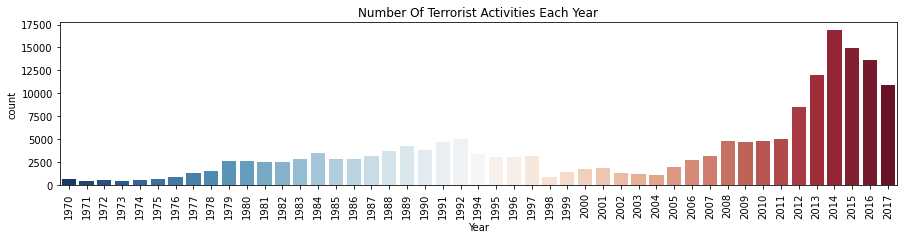

In [6]:
plt.subplots(figsize=(15,3))
sns.countplot('Year',data=df,palette='RdBu_r')
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

## Fetching no of total attacks in each country

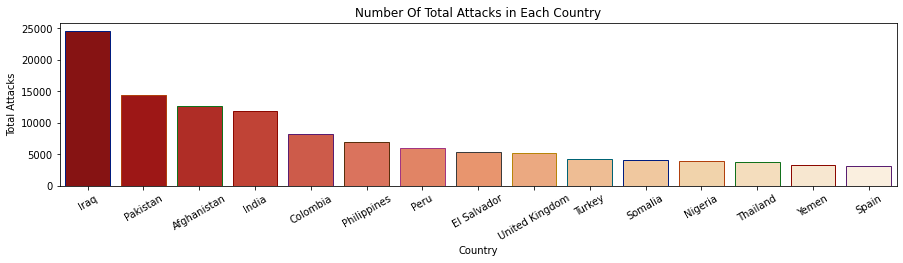

In [7]:
plt.subplots(figsize=(15,3))
country_attacks = df.Country.value_counts()[:15].reset_index()
country_attacks.columns = ['Country', 'Total Attacks']
sns.barplot(x=country_attacks.Country, y=country_attacks['Total Attacks'], palette= 'OrRd_r',edgecolor=sns.color_palette('dark',10))
plt.xticks(rotation=30)
plt.title('Number Of Total Attacks in Each Country')
plt.show()

## Fetching data of no of total attacks in each region

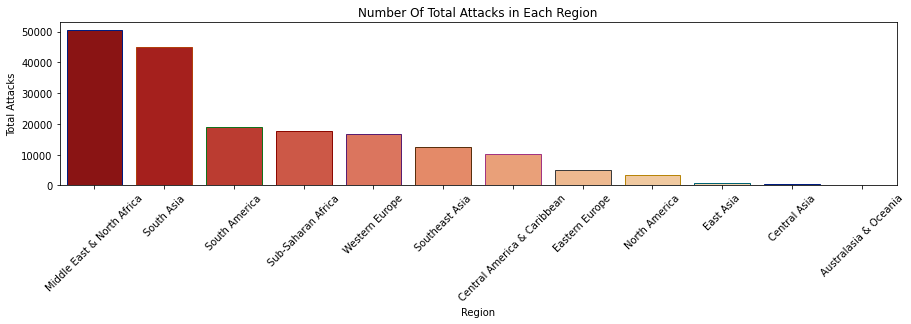

In [8]:
region_attacks = df.Region.value_counts().to_frame().reset_index()
region_attacks.columns = ['Region', 'Total Attacks']
plt.subplots(figsize=(15,3))
sns.barplot(x=region_attacks.Region, y=region_attacks['Total Attacks'], palette='OrRd_r', edgecolor=sns.color_palette('dark',10))
plt.xticks(rotation=45)
plt.title('Number Of Total Attacks in Each Region')
plt.show()

## Printing table of terrorist group and their total attacks 

In [9]:
group_attacks = df.Group.value_counts().to_frame().drop('Unknown').reset_index()[:16]
group_attacks.columns = ['Terrorist Group', 'Total Attacks']
group_attacks

,Terrorist Group,Total Attacks
0,Taliban,7478
1,Islamic State of Iraq and the Levant (ISIL),5613
2,Shining Path (SL),4555
3,Farabundo Marti National Liberation Front (FMLN),3351
4,Al-Shabaab,3288
5,New People's Army (NPA),2772
6,Irish Republican Army (IRA),2671
7,Revolutionary Armed Forces of Colombia (FARC),2487
8,Boko Haram,2418
9,Kurdistan Workers' Party (PKK),2310


## Fetching no of total attcks by different terrorist group

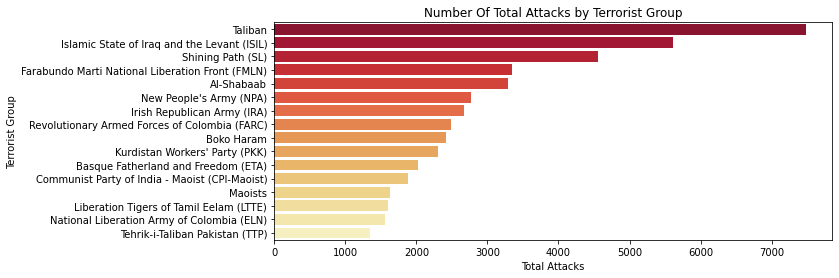

In [10]:
group_attacks = df.Group.value_counts().to_frame().drop('Unknown').reset_index()[:16]
group_attacks.columns = ['Terrorist Group', 'Total Attacks']
plt.subplots(figsize=(10,4))
sns.barplot(y=group_attacks['Terrorist Group'], x=group_attacks['Total Attacks'], palette='YlOrRd_r',
            )

plt.title('Number Of Total Attacks by Terrorist Group')
plt.show()

## Visual representation of top terrorist groups activities from 1970-2017

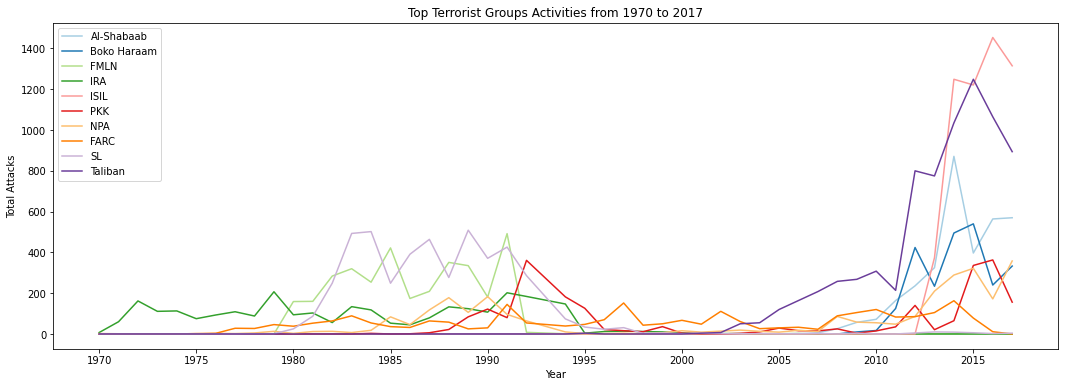

In [12]:
groups_10 = df[df.Group.isin(df.Group.value_counts()[1:11].index)]
pd.crosstab(groups_10.Year, groups_10.Group).plot(color=sns.color_palette('Paired', 10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.xticks(range(1970, 2017, 5))
plt.ylabel('Total Attacks')
plt.title('Top Terrorist Groups Activities from 1970 to 2017')
plt.legend(labels=['Al-Shabaab',
                   'Boko Haraam',
                   'FMLN',
                   'IRA',
                   'ISIL',
                   'PKK',
                   'NPA',
                   'FARC',
                   'SL',
                   'Taliban'], loc='upper left')
plt.show()

<b>Observation :-</b>

- There is a clear growth in terrorist attack from 1970 to 2017. 
- Business, Private Citizen and Property were the most targeted during terrorist attacks. 
- By considering region, Middle-east & north-africa were affected the most by terrorism and Australasia & Oceania were affected the least. 
- According to the count of countries, Iraq was the most affected and spain was the least affected by terrorism. 
- Taliban is the gruop who attacked the most. 
- From the top terrorist activities graph, it is clear that the ISIL is the gruop who attacked the most in 2017 and there is the steep decrease in terrorist activity of FMLN & IRA. 

<b>Colclusion</b>

I have successfully explored & analyzed the global terrorism dataset and i have given many conclusion points about terrorism activity during 1970-2017.

## Task 4 Completed Successfully

# Thank You